In [55]:
#Import libraries
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read dataset
dataset=pd.read_csv("/content/drive/MyDrive/data_1.csv")

In [ ]:
#---QB-Q3-STARTED---

In [4]:
#Create matrix of features and target variable column
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,-1]
Y=pd.DataFrame(Y)

In [5]:
#Split dataset into train and test data
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.20,random_state=0)

In [6]:
#Decision tree DT-A
clf=DecisionTreeClassifier(ccp_alpha=0.0040998656515897885,max_leaf_nodes=8,min_samples_leaf=11,max_features='auto',splitter='best',min_samples_split=25,max_depth=3,criterion='gini',random_state=0)
clf.fit(X_train,Y_train)
Y_test_predictions=clf.predict(X_test)
Y_test_predictions=pd.DataFrame(Y_test_predictions)

In [7]:
#test_accuracy
print("Accuracy = ",accuracy_score(Y_test,Y_test_predictions))
print("\n")
# precision
print("Precision = ",precision_score(Y_test, Y_test_predictions,average='micro'))
print("\n")
#recall
print("Recall = ",recall_score(Y_test, Y_test_predictions,average='micro'))
print("\n")

Accuracy =  0.903448275862069


Precision =  0.903448275862069


Recall =  0.903448275862069




No handles with labels found to put in legend.


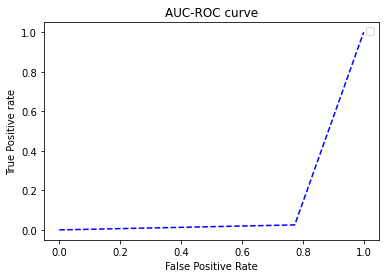

In [8]:
#AUC-ROC curve
fpr1, tpr1, thresh1 = roc_curve(Y_test,Y_test_predictions, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='blue')
plt.title('AUC-ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()

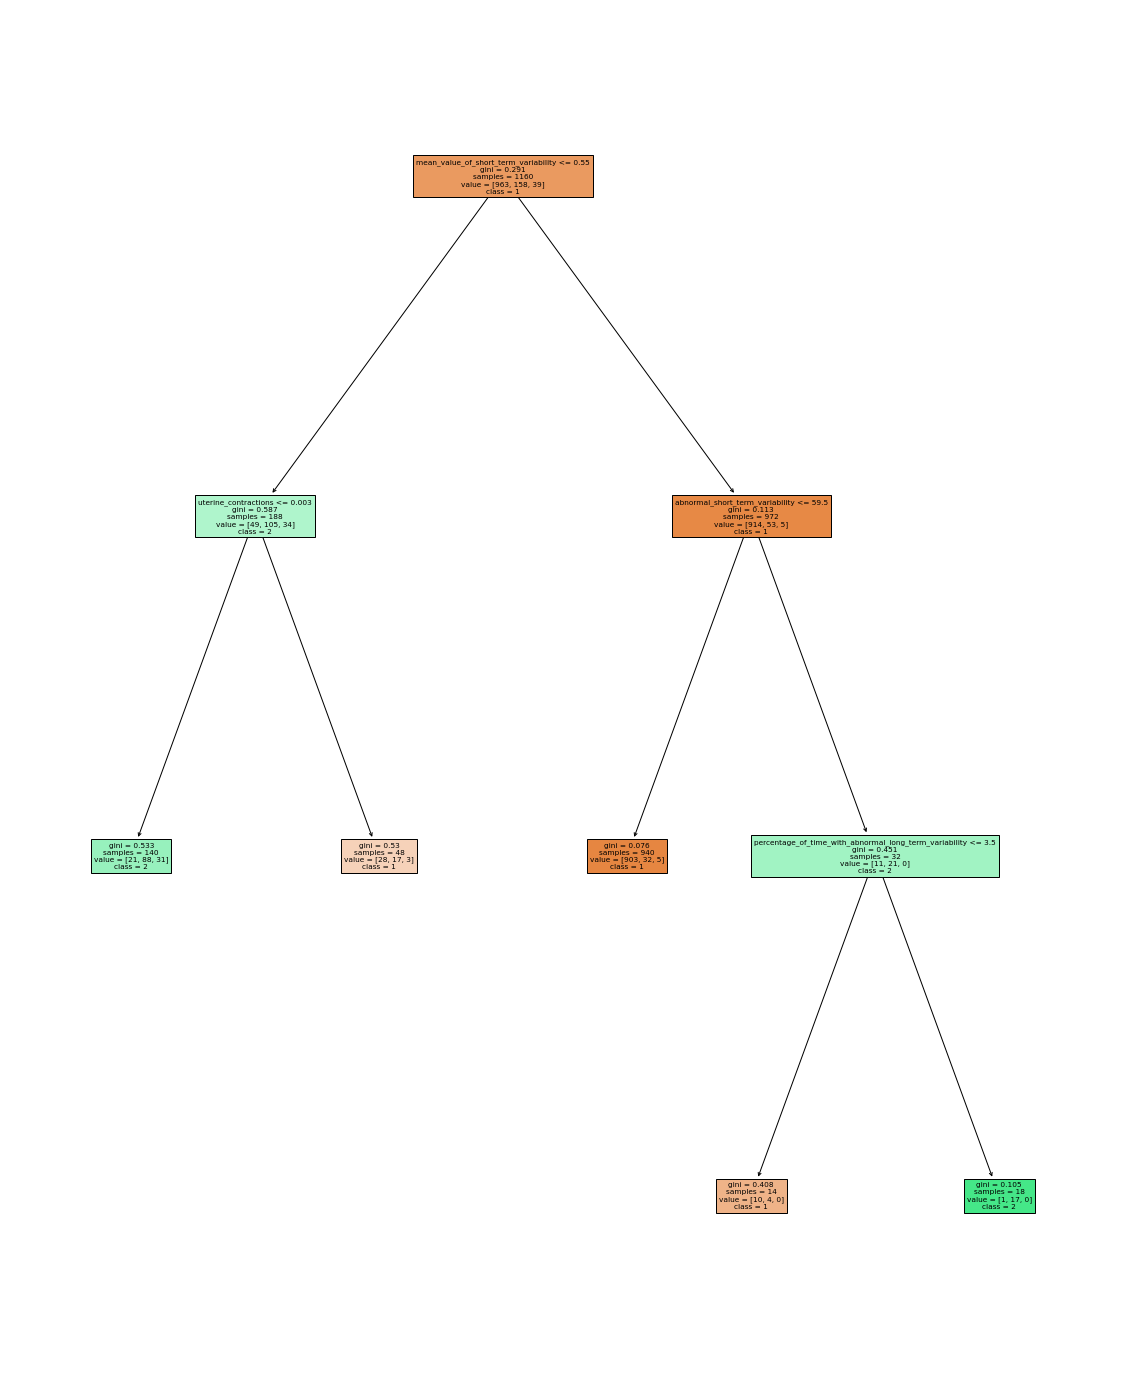

In [9]:
#Visualizing DT-A 
plt.figure(figsize=(20,25))
attributes = dataset.columns
labels = ['1','2','3']
tree.plot_tree(clf,feature_names=attributes,class_names=labels,filled=True)
plt.show()


In [11]:
#analyzing tree structure
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 8] <= 0.550000011920929 else to node 4.
	node=1 is a split node: go to node 2 if X[:, 3] <= 0.0025000000605359674 else to node 3.
		node=2 is a leaf node.
		node=3 is a leaf node.
	node=4 is a split node: go to node 5 if X[:, 7] <= 59.5 else to node 6.
		node=5 is a leaf node.
		node=6 is a split node: go to node 7 if X[:, 9] <= 3.5 else to node 8.
			node=7 is a leaf node.
			node=8 is a leaf node.


In [12]:
#visualizing leaf and non leaf nodes with thier depths
node_count = clf.tree_.node_count
left_children = clf.tree_.children_left
right_children = clf.tree_.children_right
attributes = clf.tree_.feature
limit = clf.tree_.threshold

depth_node = np.zeros(shape=node_count, dtype=np.int64)
leaf_nodes = np.zeros(shape=node_count, dtype=bool)
s = [(0, 0)]
while len(s) > 0:
    nodeidentity, nodedepth = s.pop()
    depth_node[nodeidentity] = nodedepth
    nonleaf_nodes = left_children[nodeidentity] != right_children[nodeidentity]
    if nonleaf_nodes:
        s.append((left_children[nodeidentity], nodedepth + 1))
        s.append((right_children[nodeidentity], nodedepth + 1))
    else:
        leaf_nodes[nodeidentity] = True

for j in range(node_count):
    if leaf_nodes[j]:
        print("NODE{node} is a leaf node and has depth={depth}.".format(depth=depth_node[j], node=j))
    else:
        print("NODE{node} is a non-leaf node and has depth={depth}: " "LEFT CHILD {left}  " "RIGHT CHILD {right}.".format(depth=depth_node[j],node=j,left=left_children[j],right=right_children[j]))        

NODE0 is a non-leaf node and has depth=0: LEFT CHILD 1  RIGHT CHILD 4.
NODE1 is a non-leaf node and has depth=1: LEFT CHILD 2  RIGHT CHILD 3.
NODE2 is a leaf node and has depth=2.
NODE3 is a leaf node and has depth=2.
NODE4 is a non-leaf node and has depth=1: LEFT CHILD 5  RIGHT CHILD 6.
NODE5 is a leaf node and has depth=2.
NODE6 is a non-leaf node and has depth=2: LEFT CHILD 7  RIGHT CHILD 8.
NODE7 is a leaf node and has depth=3.
NODE8 is a leaf node and has depth=3.


In [14]:
import math
#Number of attributes in dataset=m
m=22
#Number of classes in decision tree=k
k=3
#Number of training data points in decision tree=n
n=1450
#Cost for the encoding of an internal node
cost_i=math.log(m,2)
#Cost for the encoding of a leaf node
cost_l=math.log(k,2)
#Cost for the encoding of a classification error for n training data points
cost_E=math.log(n,2)
#Number of instances in test set
r=290
#Function to compute error
def Error(r,Y_pred,Y_actual):
    error=0
    for row in range(r):
        if Y_pred.iloc[row,0]!=Y_actual.iloc[row,0]:
           error=error+1
    return(error)

#FUNCTION TO COMPUTE TEST ACCURACY
def Acc(r,Y_pred,Y_actual):
    correct=0
    for row in range(r):
        if Y_pred.iloc[row,0]==Y_actual.iloc[row,0]:
           correct=correct+1
    accuracy=(correct/r)
    return(accuracy)            

#Function to compute MDL
def MDL(i,l,E):
    MDL=(i*cost_i)+(l*cost_l)+(E*cost_E)
    return MDL


               


In [15]:
# CYCLE 1

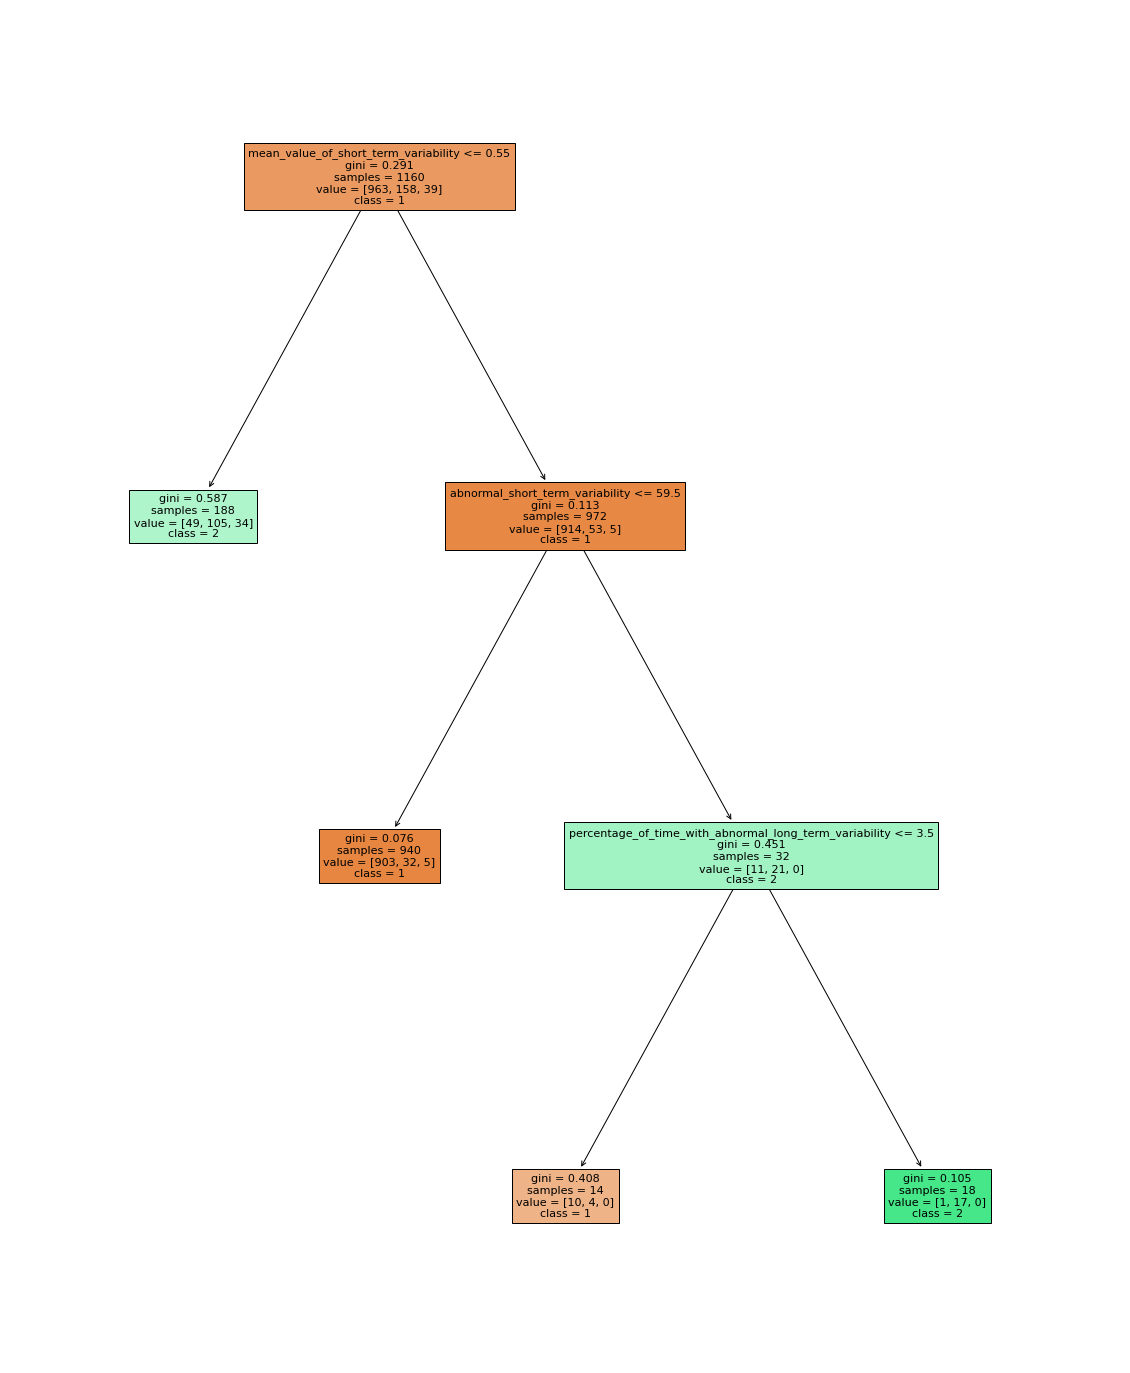

In [16]:
#REMOVAL OF NODE1
left_children[1]=-1
right_children[1]=-1


#VISUALIZE DT-A WITHOUT NODE1
plt.figure(figsize=(20,25))
attributes = dataset.columns
labels = ['1','2','3']
tree.plot_tree(clf,feature_names=attributes,class_names=labels,filled=True)
plt.show()

In [17]:
#Minimum Description Length of DT-A without NODE1

#Number of internal nodes
i=3
#Number of leaf nodes
l=4
#Error
Y_test_predictions=clf.predict(X_test)
Y_test_predictions=pd.DataFrame(Y_test_predictions)
E=Error(r,Y_test_predictions,Y_test)
#Compute MDL
mdl=MDL(i,l,E)
#Display MDL
print(mdl)

303.26774885115856


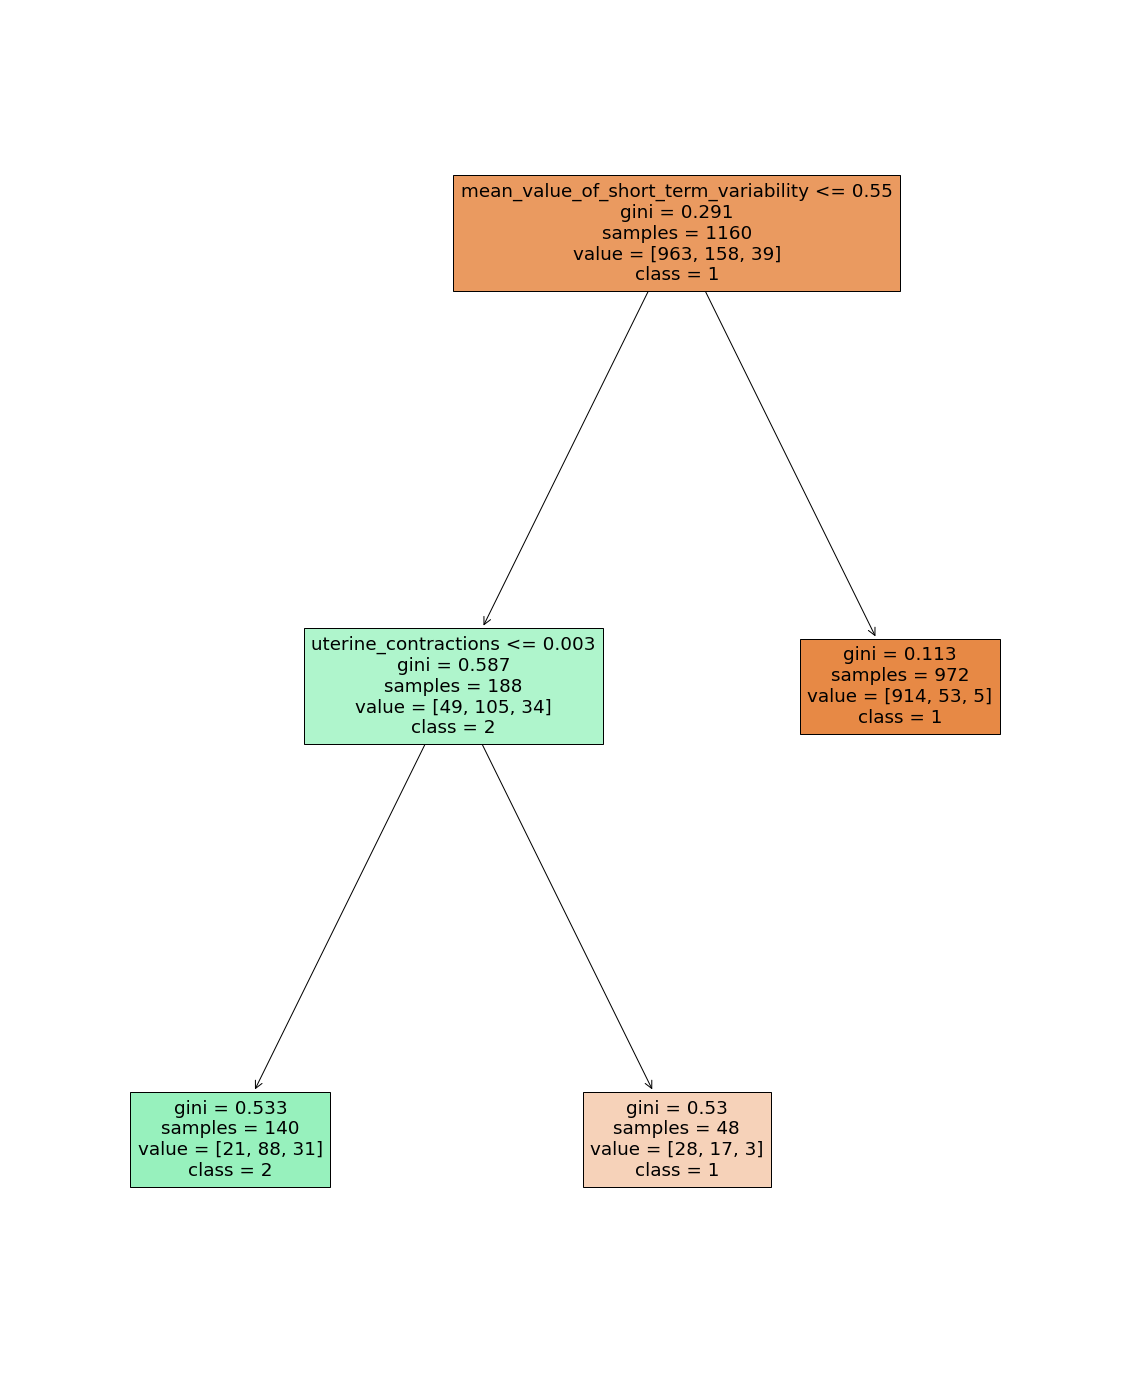

In [18]:
#ADDING BACK NODE1 IN DT-A
left_children[1]=2
right_children[1]=3
#REMOVAL OF NODE4
left_children[4]=-1
right_children[4]=-1

#VISUALIZE DT-A WITHOUT NODE4
plt.figure(figsize=(20,25))
attributes = dataset.columns
labels = ['1','2','3']
tree.plot_tree(clf,feature_names=attributes,class_names=labels,filled=True)
plt.show()

In [19]:
#Minimum Description Length of DT-A without NODE4

#Number of internal nodes
i=2
#Number of leaf nodes
l=3
#Error
Y_test_predictions=clf.predict(X_test)
Y_test_predictions=pd.DataFrame(Y_test_predictions)
E=Error(r,Y_test_predictions,Y_test)
#Compute MDL
mdl=MDL(i,l,E)
#Display MDL
print(mdl)

381.2380522110185


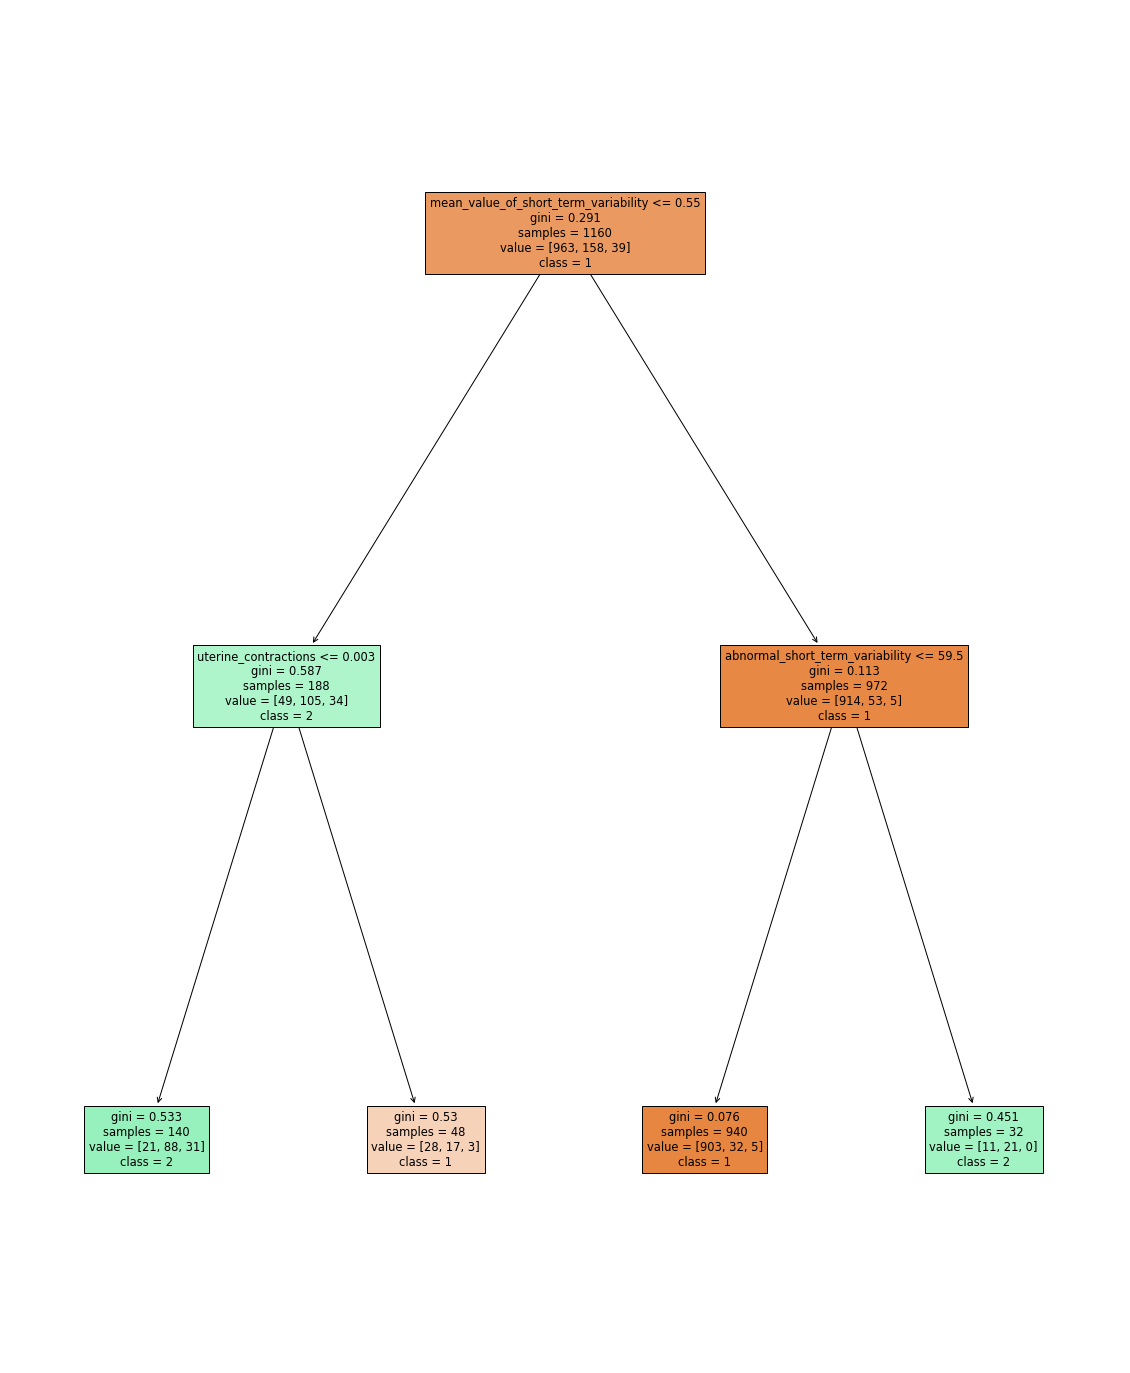

In [20]:
#ADDING BACK NODE4 IN DT-A
left_children[4]=5
right_children[4]=6
#REMOVAL OF NODE6
left_children[6]=-1
right_children[6]=-1

#VISUALIZE DT-A WITHOUT NODE6
plt.figure(figsize=(20,25))
attributes = dataset.columns
labels = ['1','2','3']
tree.plot_tree(clf,feature_names=attributes,class_names=labels,filled=True)
plt.show()

In [21]:
#Minimum Description Length of DT-A without NODE6

#Number of internal nodes
i=3
#Number of leaf nodes
l=4
#Error
Y_test_predictions=clf.predict(X_test)
Y_test_predictions=pd.DataFrame(Y_test_predictions)
E=Error(r,Y_test_predictions,Y_test)
#Compute MDL
mdl=MDL(i,l,E)
#Display MDL
print(mdl)

313.76958603606084


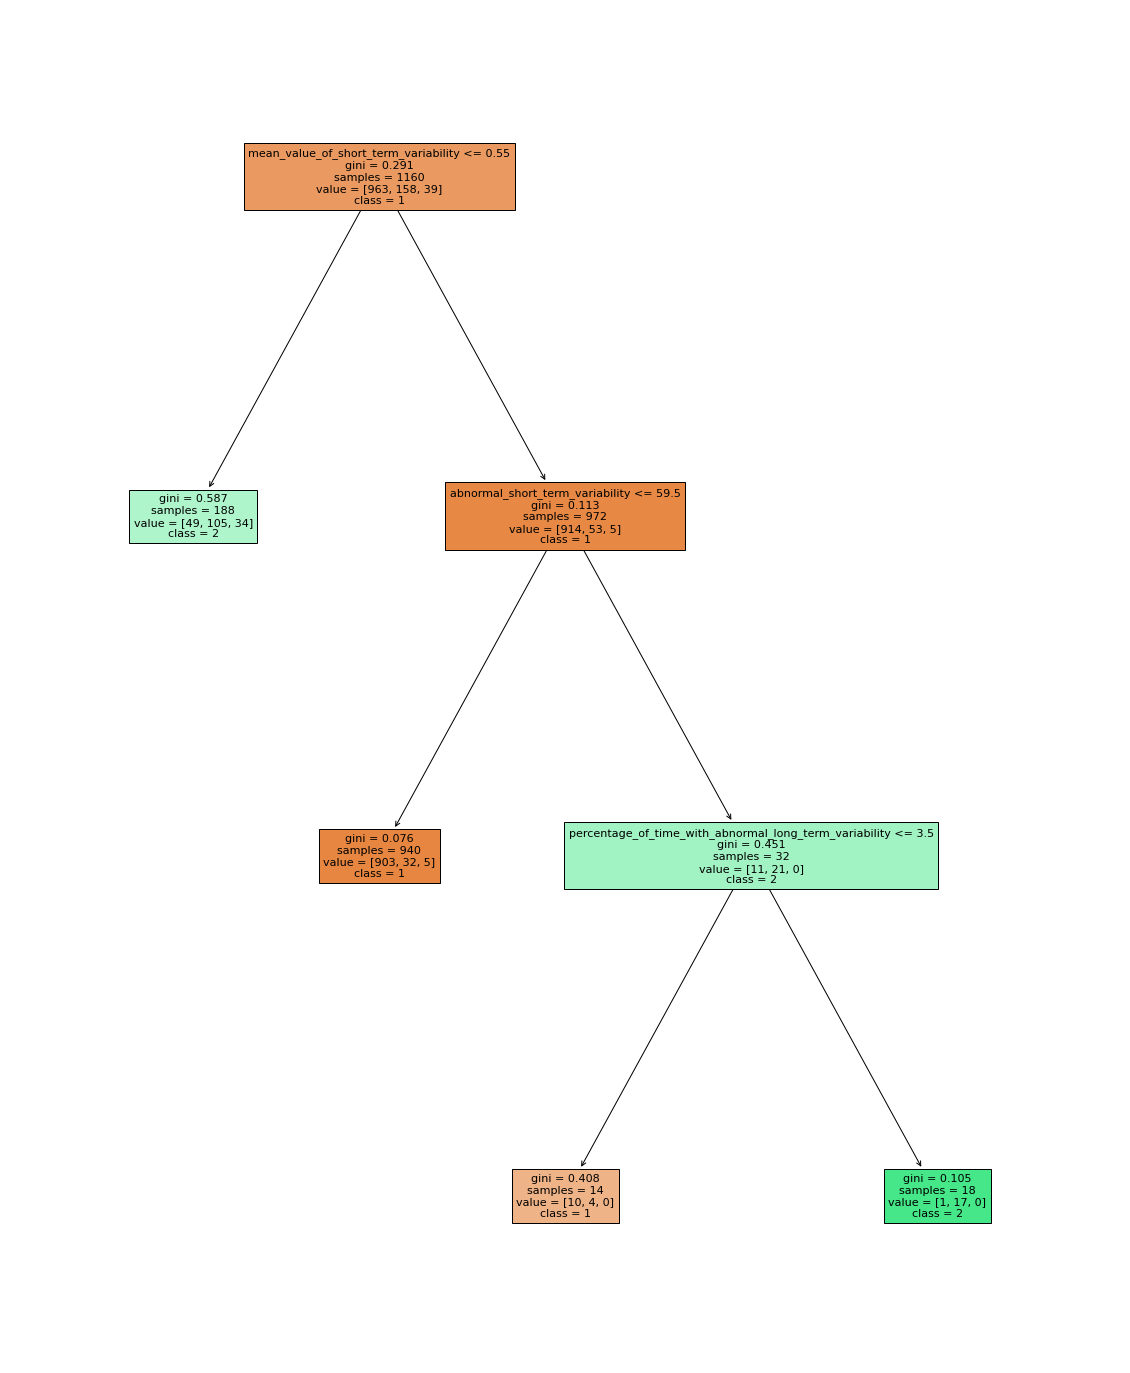

In [22]:
#MDL OF PRUNED TREES
mdl_NODE1=303.26774885115856
mdl_NODE4=381.2380522110185
mdl_NODE6=313.76958603606084
#DT-A WITHOUT NODE1 GIVES THE BEST MDL SO NODE1 IS REMOVED FROM DT-A

#ADDING BACK NODE6 IN DT-A
left_children[6]=7
right_children[6]=8
#REMOVAL OF NODE1 FROM DT-A
left_children[1]=-1
right_children[1]=-1
#VISUALIZE DT-A WITHOUT NODE1
plt.figure(figsize=(20,25))
attributes = dataset.columns
labels = ['1','2','3']
tree.plot_tree(clf,feature_names=attributes,class_names=labels,filled=True)
plt.show()



In [23]:
#Test accuracy of cycle1
Test_accuracy_cycle1=Acc(r,Y_test_predictions,Y_test)
print(Test_accuracy_cycle1)

0.903448275862069


In [24]:
#TEST ACCURACY OF DT-A BEFORE REMOVAL OF NODE1
AccuracyBefore =  0.903448275862069
#TEST ACCURACY OF DT-A AFTER REMOVAL OF NODE1
AccuracyAfter=0.906896551724138
#Test accuracy has increased therefore move ahead and further prune the tree

In [25]:
#CYCLE 2

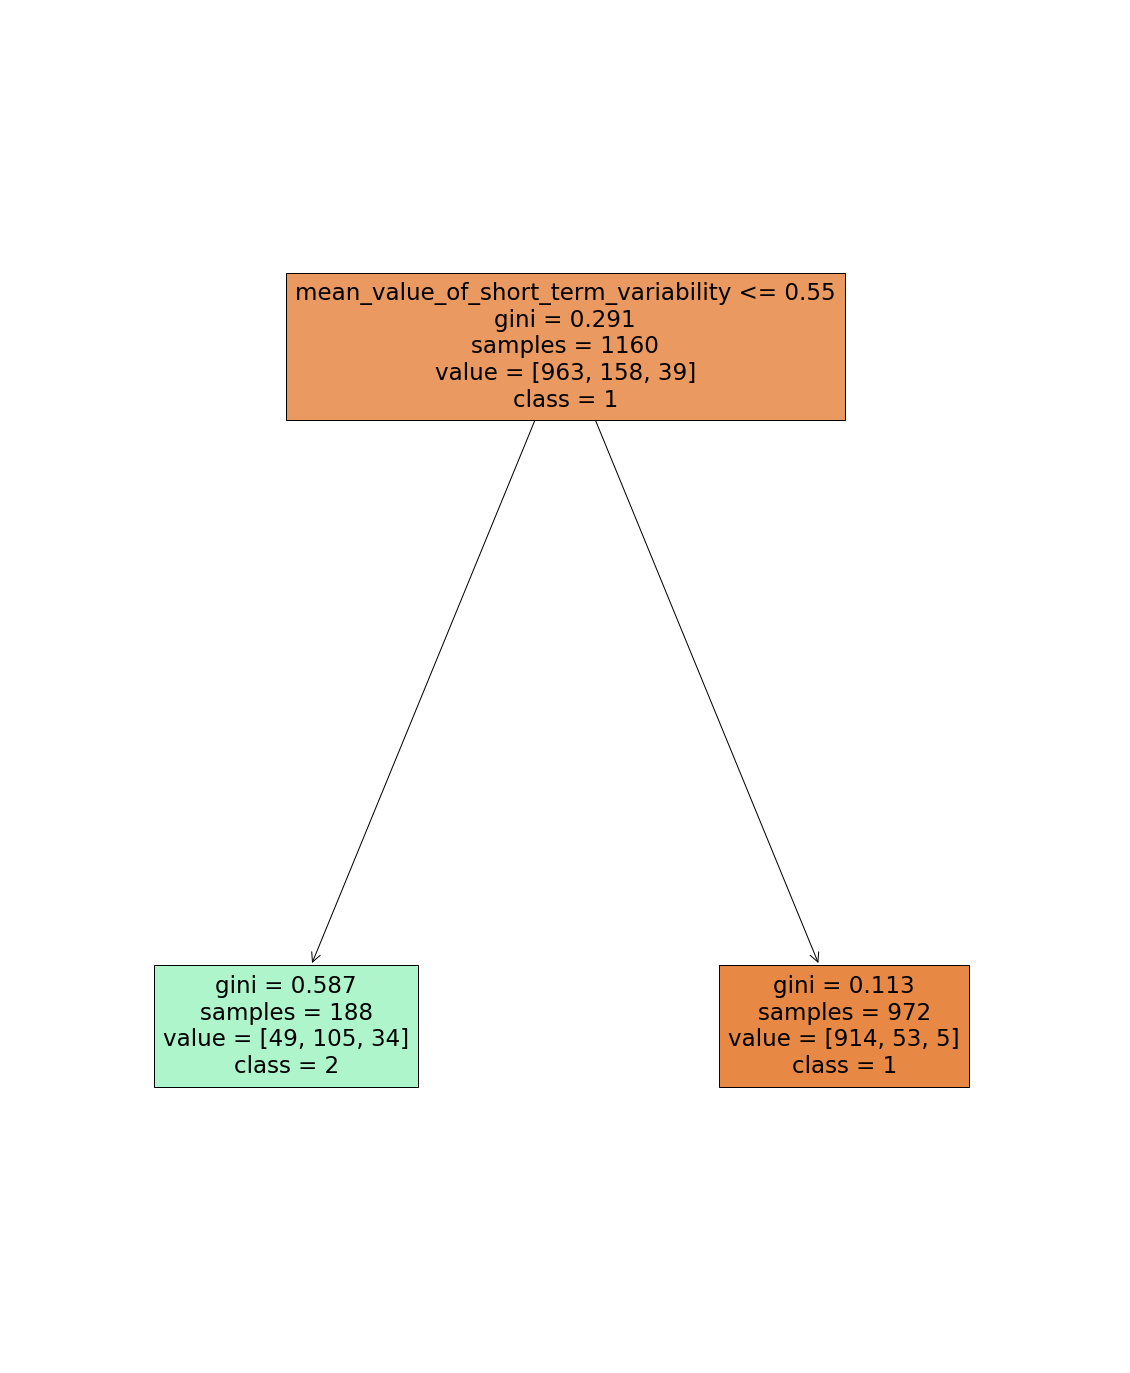

In [26]:
#REMOVAL OF NODE4
left_children[4]=-1
right_children[4]=-1

#VISUALIZE DT-A WITHOUT NODE4
plt.figure(figsize=(20,25))
attributes = dataset.columns
labels = ['1','2','3']
tree.plot_tree(clf,feature_names=attributes,class_names=labels,filled=True)
plt.show()

In [27]:
#Minimum Description Length of DT-A without NODE4

#Number of internal nodes
i=1
#Number of leaf nodes
l=2
#Error
Y_test_predictions=clf.predict(X_test)
Y_test_predictions=pd.DataFrame(Y_test_predictions)
E=Error(r,Y_test_predictions,Y_test)
#Compute MDL
mdl=MDL(i,l,E)
#Display MDL
print(mdl)

364.6918209067577


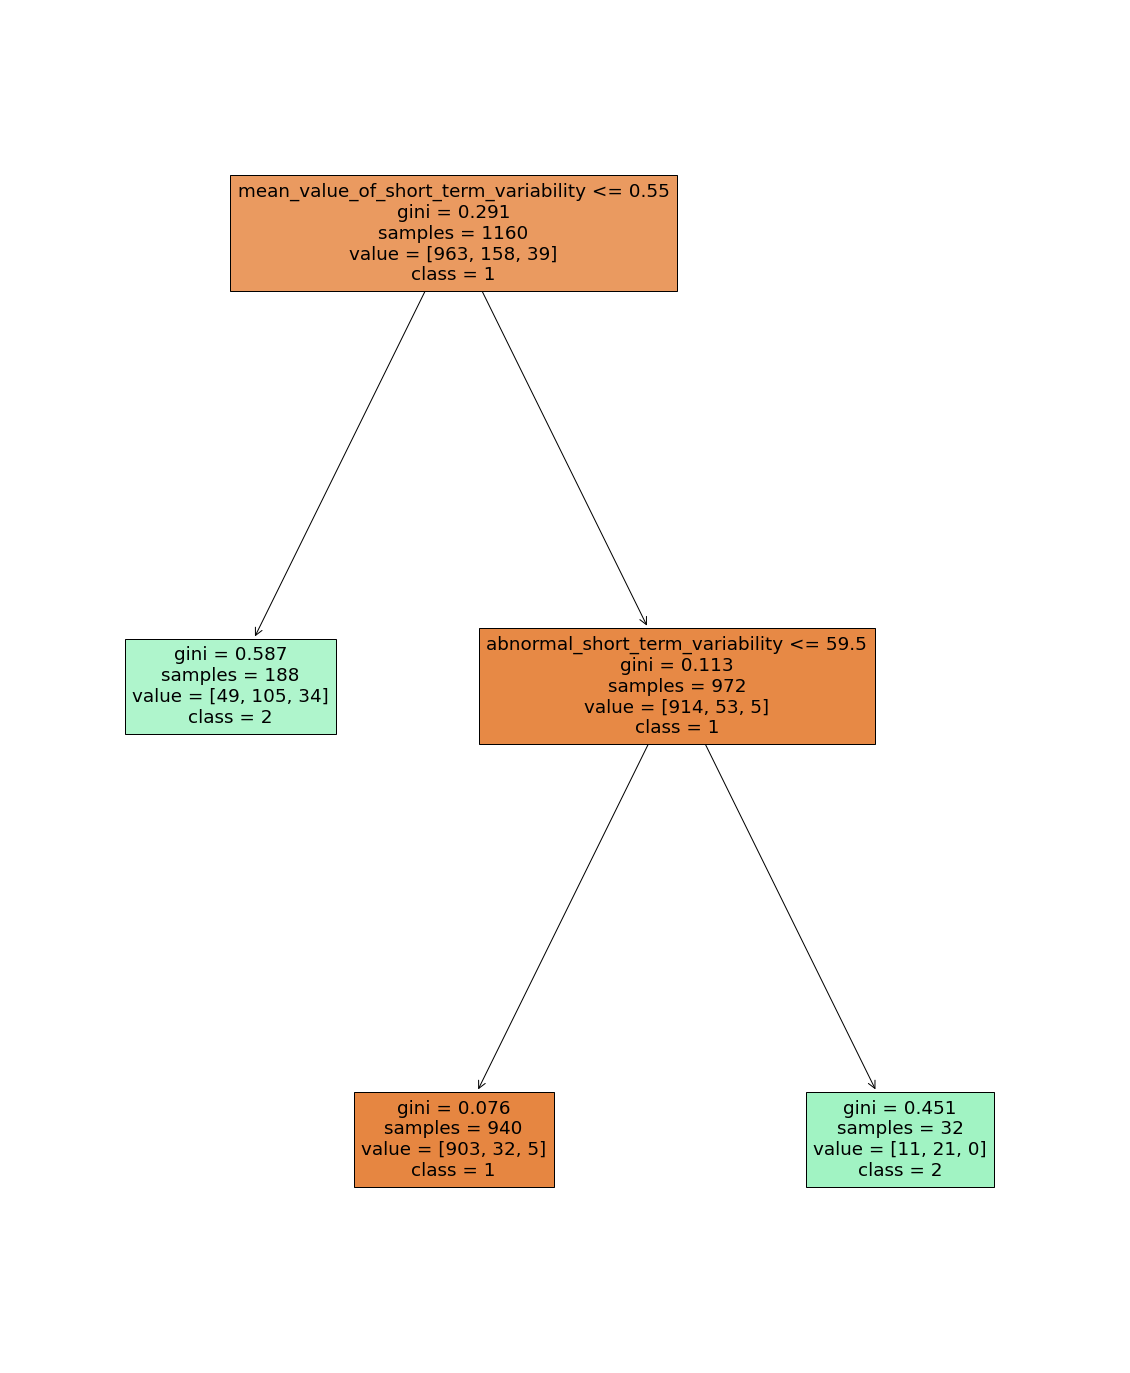

In [28]:
#ADDING BACK NODE4 IN DT-A
left_children[4]=5
right_children[4]=6
#REMOVAL OF NODE6
left_children[6]=-1
right_children[6]=-1

#VISUALIZE DT-A WITHOUT NODE6
plt.figure(figsize=(20,25))
attributes = dataset.columns
labels = ['1','2','3']
tree.plot_tree(clf,feature_names=attributes,class_names=labels,filled=True)
plt.show()

In [29]:
#Minimum Description Length of DT-A without NODE6

#Number of internal nodes
i=2
#Number of leaf nodes
l=3
#Error
Y_test_predictions=clf.predict(X_test)
Y_test_predictions=pd.DataFrame(Y_test_predictions)
E=Error(r,Y_test_predictions,Y_test)
#Compute MDL
mdl=MDL(i,l,E)
#Display MDL
print(mdl)

297.2233547318001


In [30]:
#MDL OF PRUNED TREES
mdl_NODE4=364.6918209067577
mdl_NODE6=297.2233547318001
#DT-A WITHOUT NODE6 GIVES THE BEST MDL SO NODE6 IS REMOVED FROM DT-A






In [31]:
#Test accuracy of cycle2
Test_accuracy_cycle2=Acc(r,Y_test_predictions,Y_test)
print(Test_accuracy_cycle2)

0.906896551724138


In [32]:
#TEST ACCURACY OF DT-A BEFORE REMOVAL OF NODE6
AccuracyBefore =  0.906896551724138
#TEST ACCURACY OF DT-A AFTER REMOVAL OF NODE6
AccuracyAfter= 0.906896551724138
#Test accuracy remains same therefore move ahead and further prune the tree

In [33]:
#Cycle 3

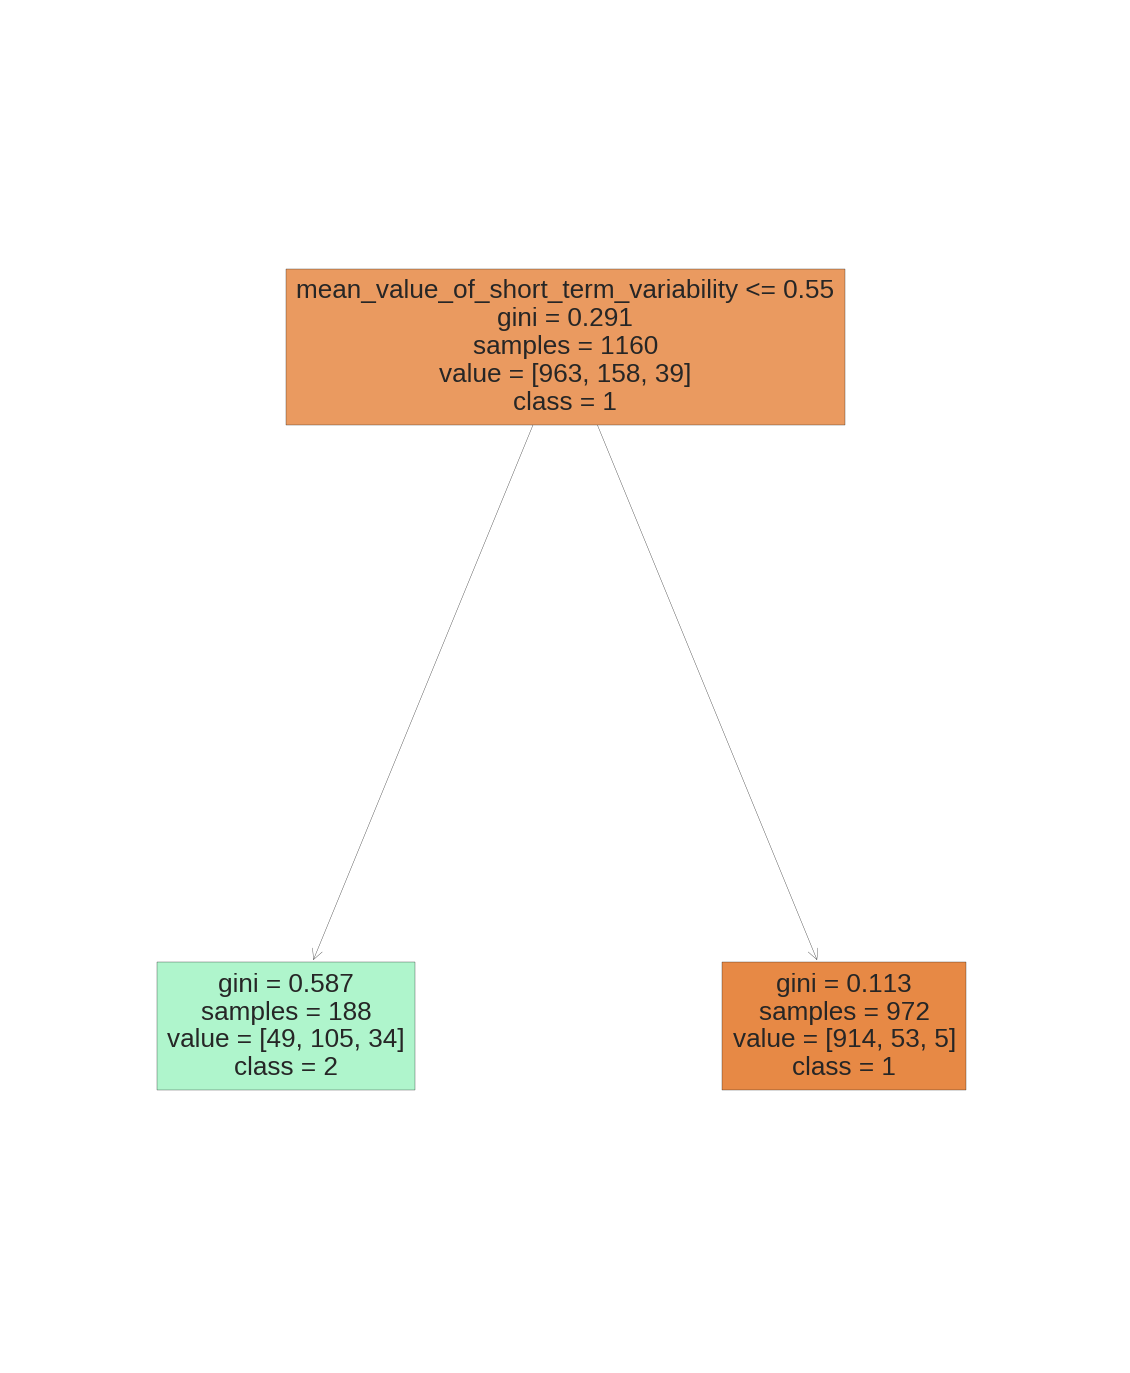

In [53]:
#---QB-Q3--DT_B_3--BEST-PERFORMING-TREE---

#REMOVAL OF NODE4
left_children[4]=-1
right_children[4]=-1

#VISUALIZE DT-A WITHOUT NODE4
plt.figure(figsize=(20,25))
attributes = dataset.columns
labels = ['1','2','3']
tree.plot_tree(clf,feature_names=attributes,class_names=labels,filled=True)
plt.show()

#---QB-Q3--DT_B_3--BEST-PERFORMING-TREE---

In [35]:
#Minimum Description Length of DT-A without NODE4

#Number of internal nodes
i=1
#Number of leaf nodes
l=2
#Error
Y_test_predictions=clf.predict(X_test)
Y_test_predictions=pd.DataFrame(Y_test_predictions)
E=Error(r,Y_test_predictions,Y_test)
#Compute MDL
mdl=MDL(i,l,E)
#Display MDL
print(mdl)

364.6918209067577


In [36]:
#Test accuracy of cycle3
Test_accuracy_cycle3=Acc(r,Y_test_predictions,Y_test)
print(Test_accuracy_cycle3)

0.8827586206896552


In [37]:
#TEST ACCURACY OF DT-A BEFORE REMOVAL OF NODE4
AccuracyBefore =  0.906896551724138
#TEST ACCURACY OF DT-A AFTER REMOVAL OF NODE4
AccuracyAfter= 0.8827586206896552
#Test accuracy decreases therefore do not move ahead and do not further prune the tree

In [ ]:
#---QB-Q3-ENDED---

In [ ]:
#---QC-Q2-STARTED---

In [38]:
df1=X_test.iloc[:,7].to_frame()
df1=df1.reset_index(drop=True)
df1

,abnormal_short_term_variability
0,44
1,53
2,78
3,51
4,33
...,...
285,56
286,70
287,35
288,40


In [39]:
Y_test_predictions.iloc[:,0]
df2=Y_test_predictions.iloc[:,0].to_frame()

In [40]:
pd.set_option('display.max_rows', 290)
result = pd.concat([df1, df2], axis=1, join='inner')
result.rename(columns={0:"Fetal Health"},inplace=True)
result.sort_values('Fetal Health')


,abnormal_short_term_variability,Fetal Health
0,44,1
176,36,1
177,29,1
178,35,1
179,63,1
181,23,1
184,32,1
185,36,1
186,65,1
187,26,1


In [41]:
filt = (result['Fetal Health']==1)


d1=result.loc[filt]
d1


,abnormal_short_term_variability,Fetal Health
0,44,1
1,53,1
3,51,1
4,33,1
5,33,1
6,27,1
7,47,1
8,21,1
10,32,1
11,22,1


In [42]:
filt = (result['Fetal Health']==2)


d2=result.loc[filt]
d2

,abnormal_short_term_variability,Fetal Health
2,78,2
9,60,2
13,67,2
22,61,2
23,84,2
24,68,2
25,65,2
26,54,2
27,74,2
31,56,2


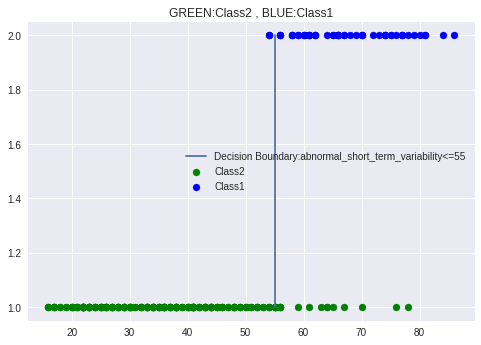

In [44]:
# PLOTTING DECISION BOUNDRIES
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

x_val=[55,55,55,55,55,55]
y_val=[1.0,1.2,1.4,1.6,1.8,2.0]

x1=d1['abnormal_short_term_variability'].to_list()	
y1=d1['Fetal Health'].to_list()


x2=d2['abnormal_short_term_variability'].to_list()	
y2=d2['Fetal Health'].to_list()

plt.scatter(x1,y1,c='green',label='Class2')
plt.scatter(x2,y2,c='blue',label='Class1')
plt.plot(x_val, y_val,label = 'Decision Boundary:abnormal_short_term_variability<=55')

plt.title('GREEN:Class2 , BLUE:Class1')
plt.legend()

In [45]:
len(x1)

237

In [46]:
len(x2)

53

In [51]:
# DISPLAYING DISTANCE OF INSTANCES FROM DICISION BOUNDARY
DISTANCE_CLASS1=[]
for i in x1:
    DISTANCE_CLASS1.append(abs(i-55))
DISTANCE_CLASS1

[11,
 2,
 4,
 22,
 22,
 28,
 8,
 34,
 23,
 33,
 17,
 12,
 6,
 38,
 10,
 22,
 4,
 14,
 32,
 30,
 5,
 10,
 18,
 38,
 30,
 21,
 1,
 31,
 34,
 29,
 17,
 18,
 20,
 27,
 17,
 14,
 33,
 12,
 37,
 32,
 31,
 10,
 37,
 7,
 26,
 30,
 3,
 33,
 1,
 9,
 23,
 19,
 11,
 18,
 6,
 13,
 33,
 32,
 23,
 13,
 0,
 2,
 34,
 13,
 11,
 25,
 17,
 27,
 0,
 25,
 6,
 29,
 7,
 32,
 27,
 17,
 31,
 24,
 18,
 14,
 33,
 1,
 15,
 7,
 1,
 32,
 16,
 7,
 22,
 15,
 23,
 18,
 15,
 12,
 31,
 17,
 27,
 35,
 26,
 19,
 1,
 12,
 21,
 9,
 20,
 16,
 33,
 18,
 19,
 27,
 17,
 35,
 13,
 29,
 14,
 14,
 38,
 28,
 29,
 15,
 7,
 3,
 25,
 17,
 33,
 32,
 32,
 21,
 33,
 21,
 23,
 14,
 7,
 11,
 25,
 25,
 8,
 5,
 19,
 26,
 20,
 8,
 32,
 23,
 19,
 10,
 29,
 1,
 25,
 28,
 22,
 17,
 19,
 12,
 9,
 36,
 28,
 19,
 4,
 12,
 5,
 21,
 21,
 34,
 0,
 24,
 30,
 0,
 29,
 29,
 14,
 16,
 17,
 21,
 11,
 22,
 39,
 39,
 32,
 20,
 14,
 39,
 0,
 11,
 14,
 22,
 3,
 21,
 0,
 21,
 19,
 33,
 9,
 27,
 35,
 14,
 11,
 36,
 20,
 38,
 33,
 12,
 28,
 0,
 19,
 33,
 6,
 34,
 

In [54]:
# DISPLAYING DISTANCE OF INSTANCES FROM DICISION BOUNDARY
DISTANCE_CLASS2=[]
for j in x2:
    DISTANCE_CLASS2.append(abs(j-55))
DISTANCE_CLASS2

[23,
 5,
 12,
 6,
 29,
 13,
 10,
 1,
 19,
 1,
 7,
 6,
 26,
 1,
 3,
 17,
 18,
 31,
 3,
 24,
 10,
 25,
 12,
 20,
 3,
 7,
 22,
 4,
 22,
 1,
 11,
 14,
 5,
 1,
 11,
 6,
 19,
 11,
 21,
 22,
 11,
 26,
 19,
 15,
 5,
 20,
 9,
 7,
 11,
 4,
 15,
 6,
 15]

In [ ]:
#----QC-Q2-ENDED----